In [6]:
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import imdb
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense

In [2]:
num_words = 10000
(X_train, y_train), (X_test, y_test) = imdb.load_data(num_words=num_words)

print("Number of training samples:", len(X_train))
print("Number of testing samples :", len(X_test))

17464789/17464789 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
Number of training samples: 25000
Number of testing samples : 25000


In [3]:
print("\nSample Encoded Review:", X_train[0][:30], "...")
print("Label:", y_train[0])


Sample Encoded Review: [1, 14, 22, 16, 43, 530, 973, 1622, 1385, 65, 458, 4468, 66, 3941, 4, 173, 36, 256, 5, 25, 100, 43, 838, 112, 50, 670, 2, 9, 35, 480] ...
Label: 1


In [4]:
word_index = imdb.get_word_index()
reverse_word_index = {value+3: key for key, value in word_index.items()}
reverse_word_index[0] = "<PAD>"
reverse_word_index[1] = "<START>"
reverse_word_index[2] = "<UNK>"
reverse_word_index[3] = "<UNUSED>"

decoded_review = " ".join([reverse_word_index.get(i, "?") for i in X_train[0]])
print("\nDecoded Review:\n", decoded_review[:500], "...")


1641221/1641221 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step

Decoded Review:
 <START> this film was just brilliant casting location scenery story direction everyone's really suited the part they played and you could just imagine being there robert <UNK> is an amazing actor and now the same being director <UNK> father came from the same scottish island as myself so i loved the fact there was a real connection with this film the witty remarks throughout the film were great it was just brilliant so much that i bought the film as soon as it was released for <UNK> and would re ...


In [7]:
maxlen = 200  # fixed sequence length
X_train_padded = pad_sequences(X_train, maxlen=maxlen)
X_test_padded = pad_sequences(X_test, maxlen=maxlen)

print("\nShapes after padding:")
print("X_train_padded:", X_train_padded.shape)
print("X_test_padded :", X_test_padded.shape)


Shapes after padding:
X_train_padded: (25000, 200)
X_test_padded : (25000, 200)


In [8]:
model = Sequential([
    Embedding(input_dim=num_words, output_dim=32, input_length=maxlen),
    LSTM(64),
    Dense(1, activation="sigmoid")
])

model.compile(optimizer="adam", loss="binary_crossentropy", metrics=["accuracy"])
model.summary()

/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

In [9]:
history = model.fit(
    X_train_padded, y_train,
    epochs=5,
    batch_size=64,
    validation_split=0.2,
    verbose=2
)

Epoch 1/5
313/313 - 42s - 135ms/step - accuracy: 0.7727 - loss: 0.4621 - val_accuracy: 0.8492 - val_loss: 0.3675
Epoch 2/5
313/313 - 40s - 127ms/step - accuracy: 0.8892 - loss: 0.2827 - val_accuracy: 0.8592 - val_loss: 0.3663
Epoch 3/5
313/313 - 38s - 122ms/step - accuracy: 0.9219 - loss: 0.2080 - val_accuracy: 0.8718 - val_loss: 0.3258
Epoch 4/5
313/313 - 40s - 128ms/step - accuracy: 0.9439 - loss: 0.1549 - val_accuracy: 0.8634 - val_loss: 0.3639
Epoch 5/5
313/313 - 39s - 126ms/step - accuracy: 0.9632 - loss: 0.1090 - val_accuracy: 0.8594 - val_loss: 0.4383


In [10]:
plt.figure(figsize=(12,5))

<Figure size 1200x500 with 0 Axes>

<Figure size 1200x500 with 0 Axes>

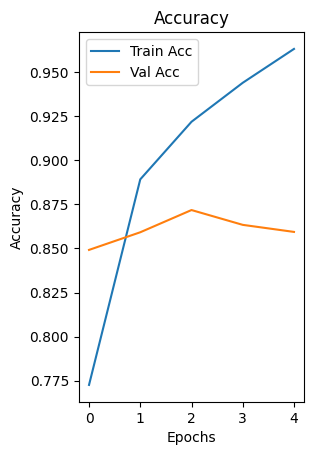

In [11]:
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title("Accuracy")
plt.xlabel("Epochs"); plt.ylabel("Accuracy"); plt.legend()

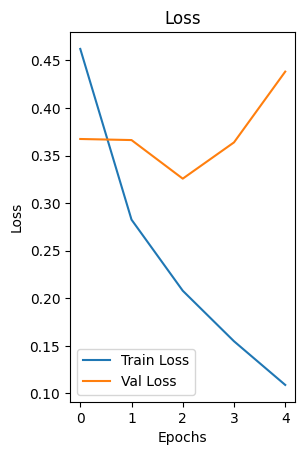

In [12]:
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("Loss")
plt.xlabel("Epochs"); plt.ylabel("Loss"); plt.legend()

plt.show()

In [13]:
test_loss, test_acc = model.evaluate(X_test_padded, y_test, verbose=0)
print(f"\nTest Accuracy: {test_acc:.4f}")


Test Accuracy: 0.8450
